# Building a Discord Post Classifier using SVM

Launch a DSEG moderator bot in discord that helps members post in the right channel. The bot will detect if a member has posted in the correct channel. If it finds that the post is in the wrong channel, it will suggest a correct channel from among the channels in the Community or Help categories. The bot will be active in discord for one week after project deadline, but can stay alive if members like it.

## Acceptance Criteria

For the bot to be enabled in DSEG, it must meet the threshold of 5% false positives on detecting posts in the wrong channel and 90% accuracy in suggesting the correct channel. A test dataset of 50 utterances has been withheld and will be used to evaluate your project upon submission. The test dataset has 3 fields: utterance, guessed-channel, true-channel. Your bot (or model) must determine if guessed channel is false with 95% specificity, and identify the true channel with 90% accuracy. There will be a leaderboard showing the performance rankings of all participants.

## Datasets

In this repo is utterance-channel-dataset.csv, a dataset consisting of 300 posts and the corresponding appropriate channel for each post.

## Plan

The plan is to preprocess your text data using TF-IDF (NLP), build a classifier using an SVM (ML), run your code in a Jupyter notebook, and leverage functions from SKLearn. Resources are available below to explain all the above concepts. If you have the time and motivation, a good challenge is to implement SVMs with stochastic gradient descent from scratch. If there is time permitting build a Flask, run it in AWS, use the Discord API, and deploy your moderator bot in our server. Keep in mind that at the halfway point and at completion you will present your work to the community. Make sure to have some progress and work to show at each point to stay accountable and to provide teaching for more novice members of the community.

## Methodology

### Loading the dataset and initial EDA

In [11]:
# Importing libraries
%matplotlib inline

import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
# Saving the CSV dataset to a pandas DF
df = pd.read_csv('data/utterance-channel-dataset.csv')

In [3]:
df.shape

(300, 3)

In [4]:
df.head(10)

,Utterance,Channel,ID
0,Separate Category for the Weekly Topic To bett...,community-requests,1
1,"hey, i would like to ask if it's possible to g...",community-requests,2
2,Any update on my ModMail about the hackathon?,community-requests,3
3,@Admins I have a suggestion. Python has some m...,community-requests,4
4,Can we have a beginner channel,community-requests,5
5,Channel Rename We've changed #async-and-concur...,community-requests,6
6,FAQ Update We've updated the Frequently Asked ...,community-requests,7
7,February data review We've published our Febru...,community-requests,8
8,Food names We've changed the names of our help...,community-requests,9
9,"Hey, I see you asked in #python-general. Pytho...",community-requests,10


In [5]:
df['Channel'].value_counts(normalize=True)

Off-topic                   0.203333
general-questions           0.140000
community-requests          0.133333
member-generated-content    0.130000
Introduction                0.116667
Resources                   0.116667
Resume Review               0.083333
General                     0.076667
Name: Channel, dtype: float64

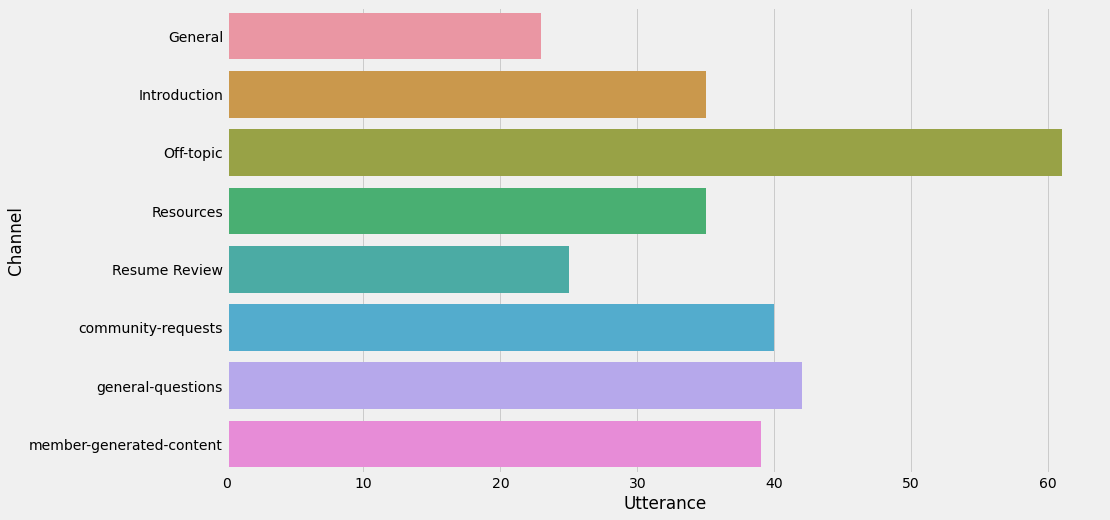

In [6]:
# Visualizing proportion of posts in the DF
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,8))

df_2 = df.groupby('Channel').count()
df_2.reset_index(inplace=True)
sns.barplot(x='Utterance', y='Channel', data=df_2);
## Edit these to get percentages 

### Preprocessing Text Data

### Building the SVM Model

In [7]:
df.head(3)

,Utterance,Channel,ID
0,Separate Category for the Weekly Topic To bett...,community-requests,1
1,"hey, i would like to ask if it's possible to g...",community-requests,2
2,Any update on my ModMail about the hackathon?,community-requests,3


Baseline model performance using data that is not preprocessed and default parameters of svm.LinearSVC

In [12]:
### must meet the threshold of 5% false positives on detecting posts in the wrong channel and 90% accuracy in suggesting the correct channel

# Splitting the values into testing and training data 
X_train, X_test, y_train, y_train = train_test_split(df["Utterance"],
                                                    df["Channel"],
                                                    test_size = 0.30, 
                                                    stratify = df["Channel"],random_state=17) #preserve the distribution and enable reproducibility

## Using tfidf Vectorizer and sklearn.svm.LinearSVC
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_train_x = vectorizer.fit_transform(train_x)
classifier = LinearSVC()
classifier.fit(tfidf_train_x.toarray(), train_y)
tfidf_test_x = vectorizer.transform(test_x) #applying tf-idf to the test data
print(tfidf_test_x.shape)
scores = cross_val_score(classifier, tfidf_test_x.toarray(), test_y, cv=5) #cross-validation
acc = scores.mean()
print("Accuracy: %0.2f percent" % (acc *100))


(90, 1435)
Accuracy: 56.67 percent
